# Task 10
# Test Hypothesis: Higher delays tend to have higher fuel consumption per passenger

Note: fuel cons is around 3-4 liters per passenger per 100km in the industry

In [1]:
import pandas as pd
import numpy as np

## Step 1. Find out number of passengers that were carried (monthly) by different air carriers
Find out distance covered monthly by different air carriers  
This information is found in the passengers DB

In [13]:
# passengers DB
passengers = pd.read_csv('passengers_cleaned.csv', index_col = 0)

C:\Users\derob\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350494 entries, 0 to 2350496
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   departures_scheduled   float64
 1   departures_performed   float64
 2   payload                float64
 3   seats                  float64
 4   passengers             float64
 5   freight                float64
 6   mail                   float64
 7   distance               float64
 8   ramp_to_ramp           float64
 9   air_time               float64
 10  unique_carrier         object 
 11  airline_id             int64  
 12  unique_carrier_name    object 
 13  region                 object 
 14  carrier                object 
 15  carrier_name           object 
 16  carrier_group          int64  
 17  carrier_group_new      int64  
 18  origin_airport_id      int64  
 19  origin_city_market_id  int64  
 20  origin                 object 
 21  origin_city_name       object 
 22  origin_country    

In [15]:
# get date range
print(f'The passengers DB is containing data from {min(passengers.year)} to {max(passengers.year)}')

The passengers DB is containing data from 2015 to 2019


In [16]:
# keep only 2018 and 2019 (flights database only has data from 2018 to 2019)
passengers = passengers[passengers.year >= 2018]

In [17]:
# get monthly number of passengers and total distance per carrier
db_passengers = pd.DataFrame(passengers.groupby(['unique_carrier', 'year', 'month'])[['passengers', 'distance']].sum())
db_passengers.head()

passengers  distance
unique_carrier year month                      
02Q            2018 3            25.0    3339.0
                    4           119.0    8585.0
                    6            86.0   13998.0
               2019 2           552.0   16318.0
                    5           158.0   12035.0

## Step 2: Find out monthly total fuel comsumption per air carrier.
This information can be found in the fuels DB


In [18]:
#fuels db
fuel = pd.read_csv('fuel_cleaned.csv', index_col = 0)

In [19]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 1 to 3034
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              3025 non-null   int64  
 1   airline_id         3025 non-null   float64
 2   unique_carrier     3025 non-null   object 
 3   carrier            3025 non-null   object 
 4   carrier_name       3025 non-null   object 
 5   carrier_group_new  3025 non-null   int64  
 6   sdomt_gallons      3025 non-null   float64
 7   satl_gallons       3025 non-null   float64
 8   spac_gallons       3025 non-null   float64
 9   slat_gallons       3025 non-null   float64
 10  sint_gallons       3025 non-null   float64
 11  ts_gallons         3025 non-null   float64
 12  tdomt_gallons      3025 non-null   float64
 13  tint_gallons       3025 non-null   float64
 14  total_gallons      3025 non-null   float64
 15  sdomt_cost         3025 non-null   float64
 16  satl_cost          3025 

In [20]:
# get date range
print(f'The fuels DB is containing data from {min(fuel.year)} to {max(fuel.year)}')

The fuels DB is containing data from 2015 to 2019


In [21]:
# keep only 2018 and 2019 (flights database only has data from 2018 to 2019)
fuel = fuel[fuel.year >= 2018]

In [22]:
# get monthly consumption per carrier
db_fuel = pd.DataFrame(fuel.groupby(['unique_carrier', 'year', 'month'])['total_gallons'].sum())
db_fuel.head()

total_gallons
unique_carrier year month               
09Q            2018 1          1467426.0
                    2          1648225.0
                    3          2539355.0
                    4          1119351.0
                    5           975540.0

## Step 3: Find out monthly delay per air carrier 
This information can be found in flights DB

In [2]:
# flights data
flights = pd.read_csv('flights_nullsremoved.csv')

C:\Users\derob\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# extract month from fl_date feature
import datetime

flights['fl_date'] = pd.to_datetime(flights['fl_date'])
flights['month'] = pd.DatetimeIndex(flights['fl_date']).month
flights['year'] = pd.DatetimeIndex(flights['fl_date']).year

In [4]:
# get date range
print(f'The flights DB is containing data from {min(flights.year)} to {max(flights.year)}')

The flights DB is containing data from 2018 to 2019


**Trying code on a sample**

In [5]:
flights_sample = flights[:1000]

In [6]:
flights_sample = flights_sample.groupby(['op_unique_carrier', 'year', 'month'])[['dep_delay', 'arr_delay']].sum()

In [7]:
flights_sample.head()

,,,dep_delay,arr_delay
op_unique_carrier,year,month,,
AA,2018,11,15337.0,15767.0
MQ,2018,11,5396.0,5492.0
OH,2018,11,2460.0,2311.0
PT,2018,11,5763.0,5737.0


In [8]:
flights_sample['monthly_delay'] = flights_sample['dep_delay'] + flights_sample['arr_delay']

In [9]:
flights_sample.head()

,,,dep_delay,arr_delay,monthly_delay
op_unique_carrier,year,month,,,
AA,2018,11,15337.0,15767.0,31104.0
MQ,2018,11,5396.0,5492.0,10888.0
OH,2018,11,2460.0,2311.0,4771.0
PT,2018,11,5763.0,5737.0,11500.0


**Running same code on flights db**

In [10]:
# get a db grouped per carrier & month
db_flights = flights.groupby(['op_unique_carrier', 'year', 'month'])[['dep_delay', 'arr_delay']].sum()

# add a column monthly_delay
db_flights['monthly_delay'] = db_flights['dep_delay'] + db_flights['arr_delay']

db_flights.head()

dep_delay  arr_delay  monthly_delay
op_unique_carrier year month                                     
9E                2018 1       204984.0    55151.0       260135.0
                       2       221215.0    84609.0       305824.0
                       3       167663.0    66252.0       233915.0
                       4       238726.0   137816.0       376542.0
                       5       176770.0    38926.0       215696.0

In [11]:
# rename unique_carrier column (it's actually op_unique_carrier)
db_flights.index.names = ['unique_carrier', 'year', 'month']

In [12]:
db_flights

dep_delay  arr_delay  monthly_delay
unique_carrier year month                                     
9E             2018 1       204984.0    55151.0       260135.0
                    2       221215.0    84609.0       305824.0
                    3       167663.0    66252.0       233915.0
                    4       238726.0   137816.0       376542.0
                    5       176770.0    38926.0       215696.0
...                              ...        ...            ...
ZW             2019 8       113329.0    78857.0       192186.0
                    9        94769.0    47397.0       142166.0
                    10       20075.0   -30286.0       -10211.0
                    11       92611.0    34008.0       126619.0
                    12       83745.0    28289.0       112034.0

[629 rows x 3 columns]

### Merge databases

In [23]:
# join the three databases
data_merged = pd.merge(db_fuel, db_passengers, on=['unique_carrier', 'year', 'month'], how='left')
data_merged = pd.merge(data_merged, db_flights, on=['unique_carrier', 'year', 'month'], how='inner')

In [24]:
data_merged

total_gallons  passengers  distance  dep_delay  \
unique_carrier year month                                                   
9E             2018 1                0.0    817219.0  337500.0   204984.0   
                    2                0.0    856848.0  302625.0   221215.0   
                    3                0.0   1122341.0  318733.0   167663.0   
                    4                0.0   1172195.0  312794.0   238726.0   
                    5                0.0   1240906.0  296608.0   176770.0   
...                                  ...         ...       ...        ...   
YX             2019 5            18888.0   1626991.0  661909.0   245194.0   
                    6            18137.0   1709879.0  831004.0   380891.0   
                    7            27361.0   1673169.0  740277.0   311431.0   
                    8            22245.0   1680699.0  837487.0   340969.0   
                    9            22895.0   1506420.0  609329.0    75054.0   

                           arr_delay  monthly_delay  
unique_carrier year month                            
9E             2018 1        55151.0       260135.0  
                    2        84609.0       305824.0  
                    3        66252.0       233915.0  
                    4       137816.0       376542.0  
                    5        38926.0       215696.0  
...                              ...            ...  
YX             2019 5       146565.0       391759.0  
                    6       312039.0       692930.0  
                    7       206056.0       517487.0  
                    8       261211.0       602180.0  
                    9       -61984.0        13070.0  

[419 rows x 6 columns]

In [25]:
# drop columns where total_gallons = 0
data_merged = data_merged[data_merged.total_gallons > 0]
data_merged

total_gallons  passengers   distance  dep_delay  \
unique_carrier year month                                                    
AA             2018 1        283974071.0  11296526.0  3015630.0   494784.0   
                    2        261946387.0  10745382.0  2896942.0   495890.0   
                    3        298906244.0  12888804.0  2989934.0   470556.0   
                    4        297784292.0  12276405.0  3213436.0   489369.0   
                    5        318954880.0  12949638.0  3206234.0   864674.0   
...                                  ...         ...        ...        ...   
YX             2019 5            18888.0   1626991.0   661909.0   245194.0   
                    6            18137.0   1709879.0   831004.0   380891.0   
                    7            27361.0   1673169.0   740277.0   311431.0   
                    8            22245.0   1680699.0   837487.0   340969.0   
                    9            22895.0   1506420.0   609329.0    75054.0   

                           arr_delay  monthly_delay  
unique_carrier year month                            
AA             2018 1        30903.0       525687.0  
                    2       135375.0       631265.0  
                    3       -16166.0       454390.0  
                    4        38006.0       527375.0  
                    5       456674.0      1321348.0  
...                              ...            ...  
YX             2019 5       146565.0       391759.0  
                    6       312039.0       692930.0  
                    7       206056.0       517487.0  
                    8       261211.0       602180.0  
                    9       -61984.0        13070.0  

[252 rows x 6 columns]

In [26]:
# reset_index
data_merged.reset_index()

,unique_carrier,year,month,total_gallons,passengers,distance,dep_delay,arr_delay,monthly_delay
0,AA,2018,1,283974071.0,11296526.0,3015630.0,494784.0,30903.0,525687.0
1,AA,2018,2,261946387.0,10745382.0,2896942.0,495890.0,135375.0,631265.0
2,AA,2018,3,298906244.0,12888804.0,2989934.0,470556.0,-16166.0,454390.0
3,AA,2018,4,297784292.0,12276405.0,3213436.0,489369.0,38006.0,527375.0
4,AA,2018,5,318954880.0,12949638.0,3206234.0,864674.0,456674.0,1321348.0
...,...,...,...,...,...,...,...,...,...
247,YX,2019,5,18888.0,1626991.0,661909.0,245194.0,146565.0,391759.0
248,YX,2019,6,18137.0,1709879.0,831004.0,380891.0,312039.0,692930.0
249,YX,2019,7,27361.0,1673169.0,740277.0,311431.0,206056.0,517487.0
250,YX,2019,8,22245.0,1680699.0,837487.0,340969.0,261211.0,602180.0


In [27]:
# compute consumption (in gallons per mile and in liters per 100km) per passenger

#gallons per mile per passenger
data_merged['gallons_per_mile_per_passenger'] = (data_merged.total_gallons / data_merged.distance) / data_merged.passengers

#liters per 100km per passenger (more used and understandable)
data_merged['liters_per_100km_per_passenger'] = data_merged['gallons_per_mile_per_passenger'] * 100/(1.60934 * 0.264172)

C:\Users\derob\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\derob\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
data_merged.head()

total_gallons  passengers   distance  dep_delay  \
unique_carrier year month                                                    
AA             2018 1        283974071.0  11296526.0  3015630.0   494784.0   
                    2        261946387.0  10745382.0  2896942.0   495890.0   
                    3        298906244.0  12888804.0  2989934.0   470556.0   
                    4        297784292.0  12276405.0  3213436.0   489369.0   
                    5        318954880.0  12949638.0  3206234.0   864674.0   

                           arr_delay  monthly_delay  \
unique_carrier year month                             
AA             2018 1        30903.0       525687.0   
                    2       135375.0       631265.0   
                    3       -16166.0       454390.0   
                    4        38006.0       527375.0   
                    5       456674.0      1321348.0   

                           gallons_per_mile_per_passenger  \
unique_carrier year month                                   
AA             2018 1                            0.000008   
                    2                            0.000008   
                    3                            0.000008   
                    4                            0.000008   
                    5                            0.000008   

                           liters_per_100km_per_passenger  
unique_carrier year month                                  
AA             2018 1                            0.001961  
                    2                            0.001979  
                    3                            0.001824  
                    4                            0.001776  
                    5                            0.001807

In [29]:
# the liters_per_100km_per_passenger measure is supposed to be around 3-4 liters. Seems to be an issue here

## Plot the results

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Consumptions per flight delays')

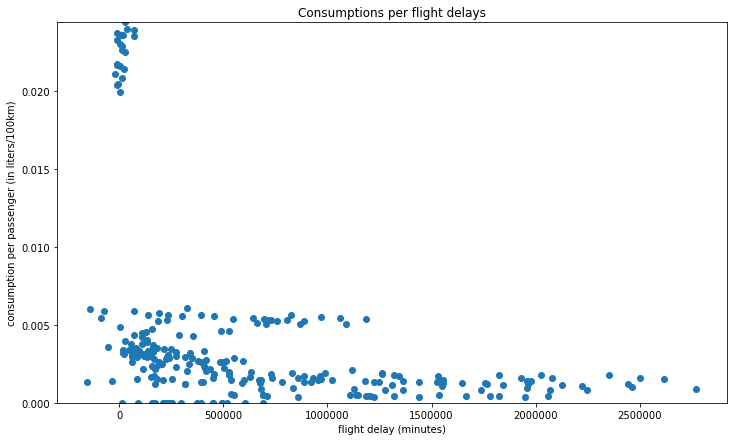

In [31]:
# plot
plt.figure(figsize=(12,7))
plt.scatter(data_merged.monthly_delay, data_merged.liters_per_100km_per_passenger)
plt.ylim(0, max(data_merged.liters_per_100km_per_passenger))
plt.ylabel('consumption per passenger (in liters/100km)')
plt.xlabel('flight delay (minutes)')
plt.title('Consumptions per flight delays')

Text(0.5, 1.0, 'Consumptions per flight delays')

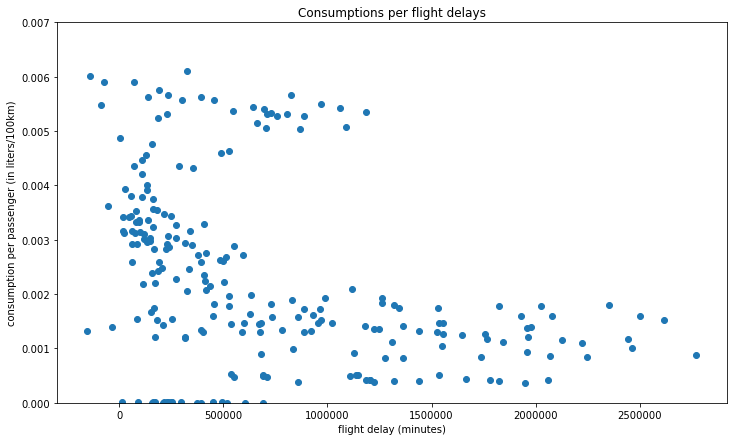

In [32]:
# check only the left cluster

plt.figure(figsize=(12,7))
plt.scatter(data_merged.monthly_delay, data_merged.liters_per_100km_per_passenger)
plt.ylim(0, 0.007)
plt.ylabel('consumption per passenger (in liters/100km)')
plt.xlabel('flight delay (minutes)')
plt.title('Consumptions per flight delays')

Conclusion: it doesn't look like the consumption per passenger is related to flight delay. There are higher consumptions and it might be for more empty flights. Let's confirm this by removing the passengers and looking at only fuel consumption per distance unit.

# Check hypothesis: Higher delays tend to have a higher fuel consumption per mile
Compare consumption in gallons per mile and see if there is a relation with delays

In [33]:
data_merged['cons_per_mile'] = data_merged.total_gallons / data_merged.distance
data_merged.head()

C:\Users\derob\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


total_gallons  passengers   distance  dep_delay  \
unique_carrier year month                                                    
AA             2018 1        283974071.0  11296526.0  3015630.0   494784.0   
                    2        261946387.0  10745382.0  2896942.0   495890.0   
                    3        298906244.0  12888804.0  2989934.0   470556.0   
                    4        297784292.0  12276405.0  3213436.0   489369.0   
                    5        318954880.0  12949638.0  3206234.0   864674.0   

                           arr_delay  monthly_delay  \
unique_carrier year month                             
AA             2018 1        30903.0       525687.0   
                    2       135375.0       631265.0   
                    3       -16166.0       454390.0   
                    4        38006.0       527375.0   
                    5       456674.0      1321348.0   

                           gallons_per_mile_per_passenger  \
unique_carrier year month                                   
AA             2018 1                            0.000008   
                    2                            0.000008   
                    3                            0.000008   
                    4                            0.000008   
                    5                            0.000008   

                           liters_per_100km_per_passenger  cons_per_mile  
unique_carrier year month                                                 
AA             2018 1                            0.001961      94.167411  
                    2                            0.001979      90.421688  
                    3                            0.001824      99.970850  
                    4                            0.001776      92.668499  
                    5                            0.001807      99.479601

Text(0.5, 1.0, 'Consumptions per flight delays')

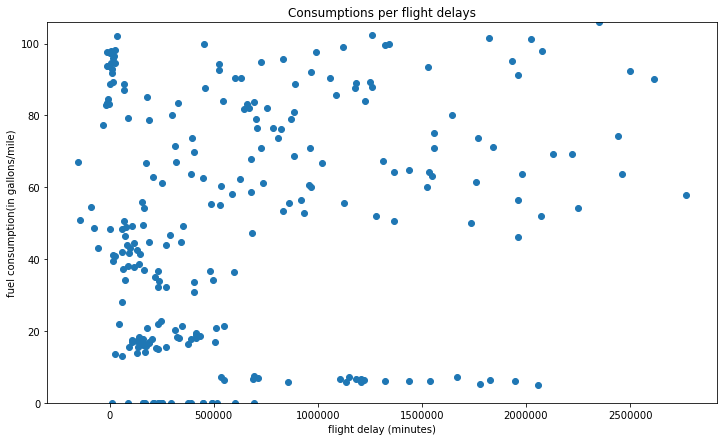

In [34]:
plt.figure(figsize=(12,7))
plt.scatter(data_merged.monthly_delay, data_merged.cons_per_mile)
plt.ylim(0, max(data_merged.cons_per_mile))
plt.ylabel('fuel consumption(in gallons/mile)')
plt.xlabel('flight delay (minutes)')
plt.title('Consumptions per flight delays')

In [35]:
# Looking at this one, it seems like higher delays tend to lead to sslightly hier fuel consumptions

In [39]:
# export merged_db
data_merged.to_csv('EDA_Task10_data.csv')